# Problema 9.3

Determinar la ganancia de un controlador proporcional para que la razón de disminución de lazo cerrado sea 1/4. La función de transferencia que describe el proceso es:

$$G_p(s)=\frac{1}{s^2+3s+1}$$

Las funciones del medidor y del elemento final de control son iguales a la unidad.

---

**Solución**

El lazo de control que propone el problema es:

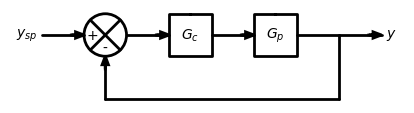

In [2]:
using PyCall, LaTeXStrings

schemdraw = pyimport("schemdraw")
dsp = pyimport("schemdraw.dsp")

d = schemdraw.Drawing(unit=1, fontsize=10)

d.add(dsp.Arrow().right().label(L"y_{sp}", "left"))
comp = d.add(dsp.Mixer(W="+", S="-").anchor("W"))
d.add(dsp.Arrow().right().at(comp.E))
control = d.add(dsp.Box(h=1, w=1).label(L"G_c").anchor("W"))
d.add(dsp.Arrow().right().at(control.E))
proc = d.add(dsp.Box(h=1, w=1).label(L"G_p").anchor("W"))
d.add(dsp.Line().right().at(proc.E))
dot = d.add(dsp.Dot(radius=0))
d.push()
d.add(dsp.Arrow().right().label(L"y", "right"))
d.pop()
d.add(dsp.Line().down().length(1.5))
d.add(dsp.Line().left().tox(comp.S))
d.add(dsp.Arrow().up().to(comp.S))

d.draw(show=false)

Por tanto, la función de transferencia que representará la dinámica del bucle de control es:

$$G = \frac{G_c G_p}{1 + G_c G_p}$$

Sustituyendo y operando se encuentra:

$$G = \frac{\frac{\mathrm{Kc}}{K_c + 1}}{\frac{1}{K_c + 1} s^2 + \frac{3}{K_c
   + 1} s + 1}$$
   
Al tratarse de un sistema de segundo orden, la constante de tiempo es: 

$$\tau = \sqrt{\frac{1}{K_c + 1}}$$

Para un sistema de segundo orden la razón de disminución es:

$$RD = \exp \left( - \frac{2 \pi \zeta}{\sqrt{1 - \zeta^2}} \right)$$

La razón de disminución debe ser de $\frac{1}{4}$, lo que supone que el coeficiente de amortiguamiento es, tras resolver la ecuación:

$$\zeta = \frac{\sqrt{5727}}{\sqrt{11920 \pi^2 + 5727}}$$

Conocido $\zeta$ calcular la ganancia del controlador resulta trivial:

$$K_c = \frac{11920 \pi^2}{5727}$$